Importando dados dos tipos de flor iris:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
print(iris.data.shape)

(150, 4)


In [3]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
n_samples, n_features = iris.data.shape

In [7]:
print(n_samples, n_features)

150 4


Plotando um gráfico

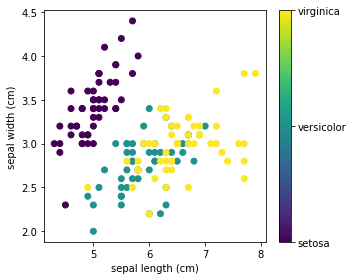

In [8]:
from matplotlib import pyplot as plt

x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

Explorando a regressão linear

Exemplo 1:

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [11]:
print(model)

LinearRegression(normalize=True)


In [15]:
import numpy as np

x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

X = x[:, np.newaxis]
model.fit(X, y)

LinearRegression(normalize=True)

In [16]:
model.coef_

array([1.])

Exemplo 2:

In [37]:
from sklearn.linear_model import LinearRegression

x = 30 * np.random.random((20, 1))

In [38]:
y = 0.5*x + 1 + np.random.normal(size=x.shape)

In [39]:
model = LinearRegression()

In [40]:
model.fit(x, y)

LinearRegression()

In [41]:
x_test = np.linspace(0,30,100)

In [42]:
y_test = model.predict(x_test[:, np.newaxis])

Plotando os resultados do exemplo 2

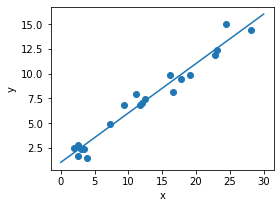

In [43]:
import matplotlib.pyplot as plt

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_test, y_test)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

Explorando o KNN um pouco

In [45]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

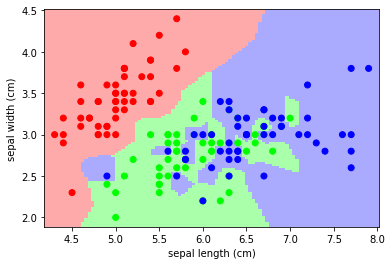

In [53]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

Redução de Dimensionalidade: PCA

In [54]:
X = iris.data
y = iris.target

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(X) 

PCA(n_components=2, whiten=True)

In [56]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

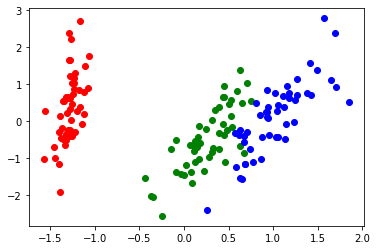

In [58]:
target_ids = range(len(iris.target_names))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=c, label=label) 